In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_venn as venn
%matplotlib inline
plt.style.use('ggplot')


def categorical_bar(x_column, y_column, table):
    temp = pd.crosstab(table[x_column], table[y_column].astype(bool))
    temp.plot(kind='bar', stacked=True, color=['red','blue'])
    plt.ylabel('users count')
    plt.savefig('pictures/'+x_column+'.png')

In [47]:
attribute = pd.read_csv('../input/attributes.csv')
product_description = pd.read_csv('../input/product_descriptions.csv')
test = pd.read_csv('../input/test.csv')
train = pd.read_csv('../input/train.csv')

In [48]:
attribute.head()

,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90° connection...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel


In [49]:
len(attribute.product_uid.unique())

86264

In [50]:
attribute.isnull().sum()

product_uid     155
name            155
value          2090
dtype: int64

In [51]:
attribute.value[0]

'Versatile connector for various 90\xc2\xb0 connections and home repair projects'

In [52]:
product_description.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [53]:
len(product_description.product_uid.unique())

124428

In [54]:
product_description.isnull().sum()

product_uid            0
product_description    0
dtype: int64

In [55]:
train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [56]:
len(train.product_uid.unique())

54667

In [57]:
train.isnull().sum()

id               0
product_uid      0
product_title    0
search_term      0
relevance        0
dtype: int64

In [58]:
test.head()

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


In [59]:
len(test.product_uid.unique())

97460

In [60]:
test.isnull().sum()

id               0
product_uid      0
product_title    0
search_term      0
dtype: int64

<matplotlib_venn._common.VennDiagram instance at 0x11e05cfc8>

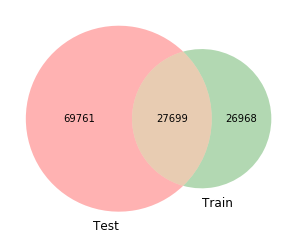

In [61]:
set_testId = set(test.product_uid.values)
set_trainId = set(train.product_uid.values)
venn.venn2([set_testId, set_trainId],['Test','Train'], alpha=0.3)

Train has 54667 unique product_uid while test has 97460. Only 27699 are in common.

<matplotlib_venn._common.VennDiagram instance at 0x12a6d28c0>

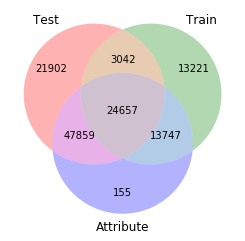

In [62]:
set_attributeId = set(attribute.product_uid.values)
venn.venn3_unweighted([set_testId, set_trainId, set_attributeId],['Test','Train', 'Attribute'], alpha=0.3)

In attribute has 155 nan values and we need to drop them.

<matplotlib_venn._common.VennDiagram instance at 0x11ebc25a8>

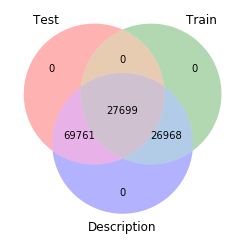

In [63]:
set_productDescriptionId = set(product_description.product_uid.values)
venn.venn3_unweighted([set_testId, set_trainId, set_productDescriptionId],['Test','Train', 'Description'], alpha=0.3)

Description cover all the product_uid in the train and test set. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1207eb310>]], dtype=object)

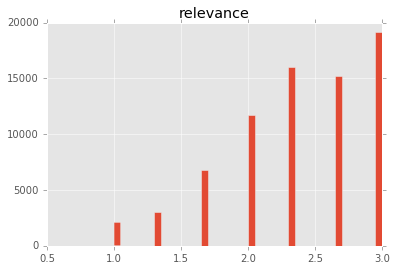

In [68]:
train.hist('relevance', bins=40)

In [72]:
train.groupby('relevance').count()['id']

relevance
1.00     2105
1.25        4
1.33     3006
1.50        5
1.67     6780
1.75        9
2.00    11730
2.25       11
2.33    16060
2.50       19
2.67    15202
2.75       11
3.00    19125
Name: id, dtype: int64

In [75]:
train.groupby(['relevance', 'product_uid']).count()['id'].max()

9

There is a really well done data exploration here https://www.kaggle.com/briantc/home-depot-product-search-relevance/homedepot-first-dataexploreation-k/comments. I do believe that right now it is more important to spend time for the preprocessing. If you have any good idea for the data exploration feel free to continue this notebook.